#### Using sklearn, take file and run generate classification model. 3 lib are used: Random Forest, SVC & Nueral networks

In [12]:
import os.path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split 
import pickle

In [13]:
def classification_performance(y_test, pred):
    # model performance
    cr = classification_report(y_test, pred)
    print ('classification_report: \n', cr)
    cm = confusion_matrix(y_test, pred)
    print ('confusion_matrix: for each classification, how may correct, how many incorrect:\n', cm )

    print ('Accuracy score:', accuracy_score(y_test, pred))

In [14]:
#Loading dataset
# wine_i = pd.read_csv('./data/winequality-red.csv', sep = ';')
wine_i = pd.read_csv(r"C:\Yahia\python\ML\data\WineQT.csv")
wine_i.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

### transform quality from number to 0 or 1 (bad or good)

In [15]:
# Pre processing
wine = wine_i.copy()
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine.quality = pd.cut(wine.quality, bins=bins, labels = group_names)
# wine.quality.unique()
label_quality = LabelEncoder()
wine.quality = label_quality.fit_transform(wine.quality)


<Axes: xlabel='quality', ylabel='count'>

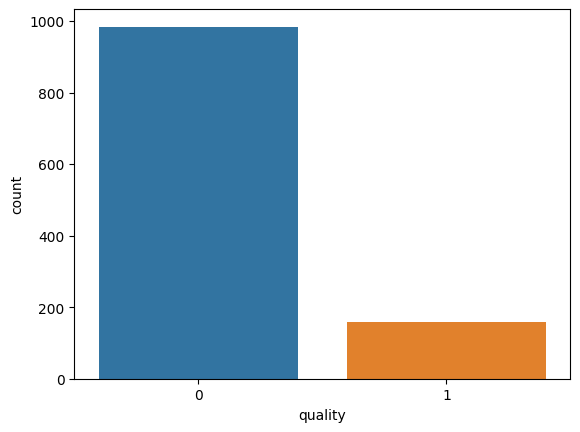

In [16]:
### Info:
# wine.quality.unique()
# wine.describe()
# wine.quality.value_counts()
sns.countplot(x = wine.quality)


In [17]:
X = wine.drop('quality', axis='columns')
y = wine.quality
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42) 

In [20]:
# Apply standard scalling to get optimized results
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

run_all_classification(X_train, X_test, y_train, y_test)

NameError: name 'run_all_classification' is not defined

## 1- Random Forest Classifier model

In [21]:
def random_forest(X_train, X_test, y_train, y_test):
    rfc = RandomForestClassifier(n_estimators=200)
    rfc.fit(X_train, y_train)
   

    # classification_performance(y_test, pred_rfc)
    return rfc

## 2- SVC Model

In [22]:
def run_SVC(X_train, X_test, y_train, y_test):
    rlf = SVC()
    rlf.fit(X_train, y_train)
    pred = rlf.predict(X_test)

    # classification_performance(y_test, pred_rlf)
    return pred

## 3- Nueral Networks

In [23]:
def run_nueral_networks(X_train, X_test, y_train, y_test):
    mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)
    mlpc.fit(X_train, y_train)
    pred = mlpc.predict(X_test)

    # classification_performance(y_test, pred)
    return pred


## run all classification models

In [25]:
reg_method= ['Random Forest Calssification', 
            'SVC Calssification', 
            'Nueral Network Calssification']

reg_functions = [random_forest, 
                    run_SVC,
                    run_nueral_networks] 
DATA_FOLDER = "./data/"
def run_all_classification(X_train, X_test, y_train, y_test, save_model=False):
    scores = []
    for reg_model_id, reg_fn in enumerate(reg_functions):
        print (20*'*', reg_method[reg_model_id],20*'*' )

        cls_model = reg_fn(X_train, X_test, y_train, y_test)
        pred = cls_model.predict(X_test)
        classification_performance(y_test, pred)
        if save_model:
            with open(f'{os.path.join(DATA_FOLDER, reg_method[reg_model_id])}.pkl', 'wb') as fid:
                pickle.dump(cls_model, fid) 
    # random_forest(X_train, X_test, y_train, y_test)
    # run_SVC(X_train, X_test, y_train, y_test)
    # run_nueral_networks(X_train, X_test, y_train, y_test)
        scores.append(accuracy_score(y_test, pred))
        break   # test one model
    best_accuracy = max(scores)
    best_model = reg_method[scores.index(best_accuracy)]
    print("******************* Summary ****************")
    print (f"Best model: {best_model} with accuracy: {best_accuracy:.2f}" )

In [30]:

# save the classifier
# with open('my_dumped_classifier.pkl', 'wb') as fid:
#     pickle.dump(gnb, fid)    

pkl_file= r"C:\Yahia\python\ML\data\SVC Calssification.pkl"
#load it again
with open(pkl_file, 'rb') as fid:
    cfcn_loaded = pickle.load(fid)

cfcn_loaded

'ovr'

In [29]:
cfcn_loaded.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [32]:
cfcn_loaded.get_params()


{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}